In [1]:
import datetime as dt
import pvlib
from openenergyid.pvsim.pvlib.models import (
    PVLibPVWattsModelChain,
    PVLibPVSystem,
    PVLibLocation,
    PVLibArray,
    PVWattsInverter,
)

In [2]:
start = dt.date(2020, 1, 1)
end = dt.date(2025, 1, 1)
timezone = "Europe/Brussels"

In [3]:
mc = PVLibPVWattsModelChain(
    system=PVLibPVSystem(
        arrays=PVLibArray(
            mount=pvlib.pvsystem.FixedMount(surface_tilt=35, surface_azimuth=240),
            modules_per_string=6,
        ),
        inverter_parameters=PVWattsInverter(pdc0=2500),
    ),
    location=PVLibLocation(latitude=51.2, longitude=4.4, tz="Europe/Brussels"),
    start=start,
    end=end,
)

In [4]:
mc.model_dump(mode="json", exclude_defaults=True)

{'system': {'arrays': {'mount': {'surface_tilt': 35.0,
    'surface_azimuth': 240.0},
   'modules_per_string': 6},
  'inverter_parameters': {'pdc0': 2500.0}},
 'location': {'latitude': 51.2, 'longitude': 4.4, 'tz': 'Europe/Brussels'},
 'start': '2020-01-01',
 'end': '2025-01-01'}

In [5]:
from openenergyid.pvsim.pvlib.main import PVLibSimulator

sim = PVLibSimulator.from_pydantic(mc)

In [6]:
sim.simulation_results

timestamp
2020-01-01 00:00:00+01:00    0.0
2020-01-01 00:15:00+01:00    0.0
2020-01-01 00:30:00+01:00    0.0
2020-01-01 00:45:00+01:00    0.0
2020-01-01 01:00:00+01:00    0.0
                            ... 
2024-12-31 22:45:00+01:00    0.0
2024-12-31 23:00:00+01:00    0.0
2024-12-31 23:15:00+01:00    0.0
2024-12-31 23:30:00+01:00    0.0
2024-12-31 23:45:00+01:00    0.0
Name: p_mp, Length: 175392, dtype: float64

<Axes: xlabel='timestamp'>

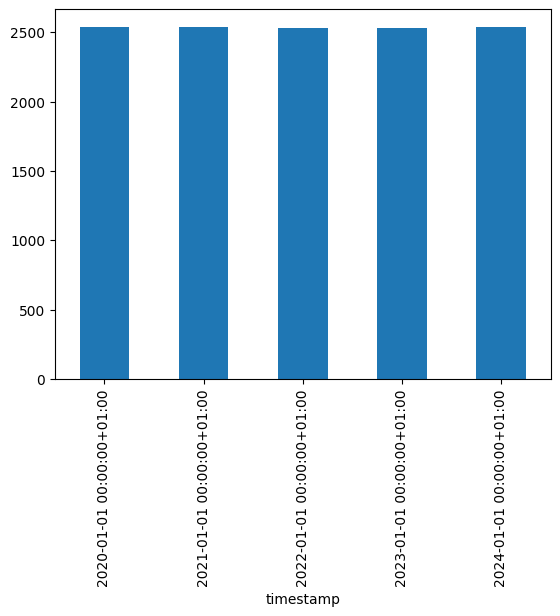

In [7]:
sim.simulation_results.resample("YS").sum().plot.bar()

In [9]:
sim.weather.resample("YS").mean()

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
timestamp,,,,,,,,,
2020-01-01 00:00:00+01:00,10.889764,78.544265,121.248862,111.403885,67.343352,316.305857,3.468691,191.661088,101430.220856
2021-01-01 00:00:00+01:00,10.897828,78.531182,121.407877,111.575150,67.402854,316.365959,3.467118,191.534703,101430.231735
2022-01-01 00:00:00+01:00,10.897828,78.531182,121.407877,111.575150,67.402854,316.365959,3.467118,191.534703,101430.231735
2023-01-01 00:00:00+01:00,10.897828,78.531182,121.407877,111.575150,67.402854,316.365959,3.467118,191.534703,101430.231735
2024-01-01 00:00:00+01:00,10.889764,78.544265,121.248862,111.403885,67.343352,316.305857,3.468691,191.661088,101430.220856


In [10]:
sim.weather

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
timestamp,,,,,,,,,
2020-01-01 00:00:00+01:00,5.0700,96.3100,0.0,0.0,0.0,313.06,1.9500,245.0,103130.0
2020-01-01 00:15:00+01:00,4.9550,96.4350,0.0,0.0,0.0,313.18,1.9150,241.0,102997.5
2020-01-01 00:30:00+01:00,4.8400,96.5600,0.0,0.0,0.0,313.30,1.8800,237.0,102865.0
2020-01-01 00:45:00+01:00,4.7250,96.6850,0.0,0.0,0.0,313.42,1.8450,233.0,102732.5
2020-01-01 01:00:00+01:00,4.6100,96.8100,0.0,0.0,0.0,313.54,1.8100,229.0,102600.0
...,...,...,...,...,...,...,...,...,...
2024-12-31 22:45:00+01:00,5.6425,95.6950,0.0,0.0,0.0,312.46,2.1125,248.0,103167.5
2024-12-31 23:00:00+01:00,5.5300,95.8200,0.0,0.0,0.0,312.58,2.0800,247.0,103160.0
2024-12-31 23:15:00+01:00,5.4150,95.9425,0.0,0.0,0.0,312.70,2.0475,246.5,103152.5
